# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [22]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
browser = Browser('chrome')

The chromedriver version (125.0.6422.141) detected in PATH at /opt/homebrew/bin/chromedriver might not be compatible with the detected chrome version (126.0.6478.61); currently, chromedriver 126.0.6478.61 is recommended for chrome 126.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [25]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [26]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

In [28]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=columns)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [29]:
# Confirm DataFrame was created successfully
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [30]:
# Examine data type of each column
mars_months = df['month'].nunique()
mars_months

12

In [31]:
# Change data types for data analysis


In [32]:
# Confirm type changes were successful by examining data types again


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?


In [34]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].nunique()

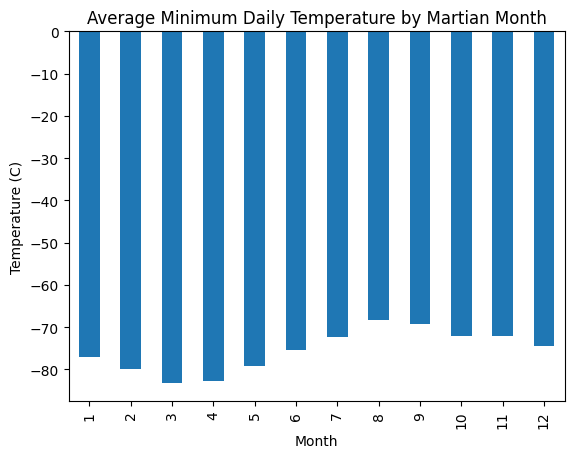

In [35]:
# 3. What is the average low temperature by month?
# Find the average minimum daily temperature for each month
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
avg_min_temp.plot(kind='bar', title='Average Minimum Daily Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()


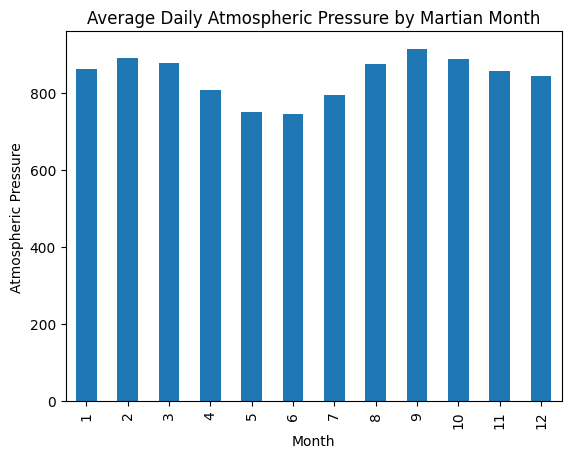

In [36]:
# Plot the average temperature by month
# Find the average daily atmospheric pressure for each month
avg_pressure = df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart
avg_pressure.plot(kind='bar', title='Average Daily Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [37]:
# Identify the coldest and hottest months in Curiosity's location


In [38]:
# 4. Average pressure by Martian month


In [39]:
# Plot the average pressure by month


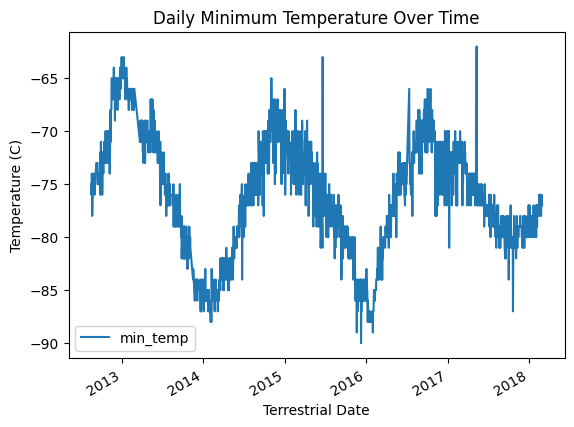

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the daily minimum temperature over time
df.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Temperature (C)')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV

df.to_csv('mars_weather_data.csv', index=False)

In [42]:
browser.quit()